## **Práctica 6: Clasificación con Regresión Logística**

Nombre: Alfonso Murrieta Villegas

Email: alfonsomvmx@outlook.com

## **1.Importación de bibliotecas y datos**

Fuente del dataset:

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

Fuente: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 

In [2]:
# Import and read dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
BreastCancer = pd.read_csv('/content/WDBCOriginal.csv')
BreastCancer.head()

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [4]:
print(BreastCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


## **2. Selección de características**

Matriz de correlaciones para seleccionar las variables significativas

In [5]:
Matriz = BreastCancer.corr(method='pearson')
Matriz

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


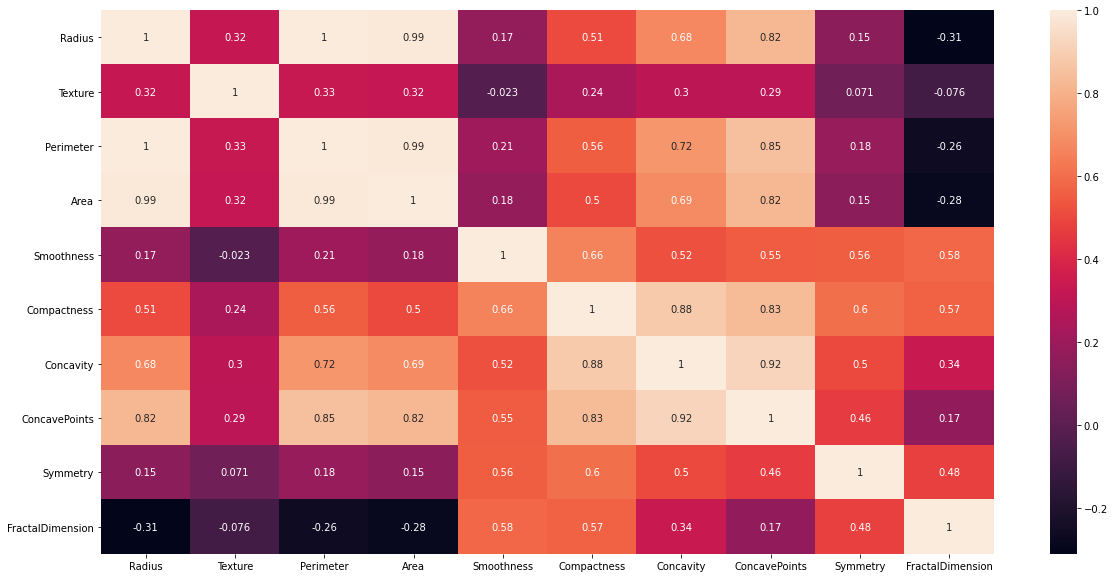

In [6]:
plt.figure(figsize = (20,10))
sb.heatmap(Matriz, annot = True)    
#NOTA: Un Heatmap es una representación gráfica de datos en colores

Con base en el heatmap seleccionamos las variables más significativas:

- Textura [Posición 3]

- Area [Posición 5]

- Compactness [Posición 7]

- Concavity [Posición 8]

- Symmetry [Posición 10]

- FractalDimension [Posición 11]


## **3. Variables para la predicción y selección de la variable clase**



Discretización o apartado de ajuste de variables

In [7]:
BCancer = BreastCancer.replace({'M': 0, 'B': 1})
BCancer.head()

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,P-842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,P-84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,P-84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,P-84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [8]:
#Variables predictoras
X = np.array(BCancer[['Texture', 'Area', 'Compactness','Concavity', 'Symmetry', 'FractalDimension']])
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,10.38,1001.0,0.27760,0.3001,0.2419,0.07871
1,17.77,1326.0,0.07864,0.0869,0.1812,0.05667
2,21.25,1203.0,0.15990,0.1974,0.2069,0.05999
3,20.38,386.1,0.28390,0.2414,0.2597,0.09744
4,14.34,1297.0,0.13280,0.1980,0.1809,0.05883


In [9]:
#Variable clase o de pronóstico
Y = np.array(BCancer[['Diagnosis']])
pd.DataFrame(Y).head()

,0
0,0
1,0
2,0
3,0
4,0


Graficación de la data y distribución de los casos clínicos

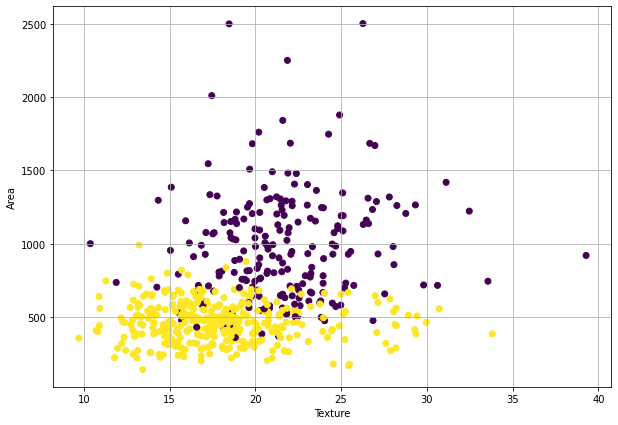

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c = BCancer.Diagnosis)
plt.grid()
plt.xlabel('Texture')
plt.ylabel('Area')
plt.show()

## **4. Apartado de la Regresión Logística**


Bibliotecas para el modelo de regresión logística





In [11]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
Clasificacion = linear_model.LogisticRegression()
test_size = 0.2
seed = 1234

# Train Data on Model 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed, shuffle = True)
pd.DataFrame(X_train).head(10)

,0,1,2,3,4,5
0,18.22,493.1,0.16610,0.048250,0.1709,0.07253
1,22.44,378.4,0.08194,0.048240,0.2030,0.06552
2,20.76,480.4,0.12090,0.106500,0.1735,0.07070
3,23.84,499.0,0.12620,0.112800,0.1905,0.06590
4,18.32,340.9,0.04462,0.019930,0.2372,0.05768
5,19.51,815.8,0.18930,0.223600,0.2151,0.06578
6,16.62,381.1,0.03834,0.013690,0.1511,0.06148
7,17.84,572.3,0.04052,0.019970,0.1573,0.05520
8,21.41,380.3,0.05978,0.008955,0.1615,0.06144
9,14.96,373.9,0.09097,0.053970,0.1776,0.06907


In [13]:
# Tran Data on Y variable (Pronóstico)
pd.DataFrame(Y_train).head(10)

,0
0,1
1,1
2,1
3,0
4,1
5,0
6,1
7,1
8,1
9,1


Entrenamiento del modelo y predicciones probabilísticas

In [14]:
Clasificacion.fit(X_train, Y_train)
Probabilidad = Clasificacion.predict_proba(X_train)
pd.DataFrame(Probabilidad).head(10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,0.089340,0.910660
1,0.052251,0.947749
2,0.130881,0.869119
3,0.256818,0.743182
4,0.014399,0.985601
5,0.878536,0.121464
6,0.014313,0.985687
7,0.125427,0.874573
8,0.036158,0.963842
9,0.012655,0.987345


Predicción mediante la clasificación final

In [15]:
Predicciones = Clasificacion.predict(X_train)
pd.DataFrame(Predicciones).head(10)

,0
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [16]:
#Para la evaluación la exactitud (accuracy) se puede usar la función score()
Clasificacion.score(X_train, Y_train)

0.8967032967032967

### **5. Validación del modelo**

Matriz de clasificación (Con esta se hace la validación de nuestro modelo)

In [17]:
#Matriz de clasificación
PrediccionesNuevas = Clasificacion.predict(X_test)
confusion_matrix = pd.crosstab(Y_test.ravel(), PrediccionesNuevas, rownames=['Real'], colnames=['Predicción'])
confusion_matrix

Predicción,0,1
Real,,
0,39,6
1,2,67


Obtención de valores que validan nuestro modelo,  

In [18]:
#Reporte de la clasificación
print("Exactitud", Clasificacion.score(X_test, Y_test))

Exactitud 0.9298245614035088


In [19]:
print(classification_report(Y_test, PrediccionesNuevas))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.92      0.97      0.94        69

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Descripción final del modelo obtenido

In [20]:
print("Intercept: ", Clasificacion.intercept_)
print('Coeficientes: ', Clasificacion.coef_)


Intercept:  [11.72346938]
Coeficientes:  [[-0.1908854  -0.0106113  -2.27353782 -3.0783869  -0.87661688 -0.2123106 ]]


Modelo obtenido: 

**a+bX** = *11.72 - 0.19Texture – 0.01Area – 2.27Compactness – 3.08Concavity – 0.88Symmetry - 0.21FractalDimension*

### **6. Pronósticos de casos particulares**


**Interpretación de los datos:**

[1] = Benigno 

[0] = Maligno

**Paciente 1** 

Entrada de datos del Paciente:

- Número 569

- Id P-92751

In [21]:
NuevoPaciente1 = pd.DataFrame({'Texture': [24.54], 'Area': [181.0], 'Compactness': [0.04362], 'Concavity': [0.00000], 'Symmetry': [0.1587], 'FractalDimension': [1.000000]})

Resultado obtenido: (Cáncer Benigno)

In [22]:
Clasificacion.predict(NuevoPaciente1)

array([1])

**Paciente 2** 

Entrada de datos del Paciente:

- Número 1

- Id P-842302

In [23]:
NuevoPaciente2 = pd.DataFrame({'Texture': [10.38], 'Area': [1001.0], 'Compactness': [0.27760], 'Concavity': [0.676764], 'Symmetry': [0.2419], 'FractalDimension': [0.07871]})


Resultado obtenido: (Cáncer Maligno)

In [24]:
Clasificacion.predict(NuevoPaciente2)

array([0])

**Paciente 3** 

Entrada de datos del Paciente:

- Número 2

- IdP-84300903

In [25]:
NuevoPaciente3 = pd.DataFrame({'Texture': [21.25], 'Area': [1203.0], 'Compactness': [0.15990], 'Concavity': [0.1974], 'Symmetry': [0.2069], 'FractalDimension': [0.05999]})

Resultado obtenido: (Cáncer Maligno)

In [26]:
Clasificacion.predict(NuevoPaciente3)

array([0])

**Paciente 4** 

Entrada de datos del Paciente:

- Número 4

- Id P-84358402 	



In [27]:
NuevoPaciente4 = pd.DataFrame({'Texture': [14.34], 'Area': [1297.0], 'Compactness': [0.13280], 'Concavity': [0.1980], 'Symmetry': [0.1809], 'FractalDimension': [0.05883]})

Resultado obtenido: (Cáncer Maligno)

In [28]:
Clasificacion.predict(NuevoPaciente4)

array([0])